In [17]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Housing.csv')  # Built-in Titanic dataset

# Display first few rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [5]:
# List of categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# One-hot encoding (drop_first avoids multicollinearity)
df_encoded = pd.get_dummies(df, columns=categorical_cols,drop_first=True)

print(df_encoded.head())



      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

In [18]:
print(df_encoded.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [ ]:
# List of categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# One-hot encoding (drop_first avoids multicollinearity)
df1_encoded = pd.get_dummies(df, columns=categorical_cols , drop_first=True)

print(df1_encoded.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

In [6]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('price', axis=1)  # Features
y = df_encoded['price']              # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler (fitted on training data) to transform test data
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled

array([[ 0.38416819,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [ 0.9291807 ,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027],
       [-0.60775457, -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  , -0.67690027],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  ,  1.47732249],
       [ 0.15707965,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027]])

In [28]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print(X_test_scaled_df)

         area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
316  0.338750  1.394055   1.539173  0.254215  0.367957     -2.456066   
77   0.611257  0.055271   1.539173  1.420929 -0.803059      0.407155   
360 -0.506019 -1.283514  -0.557950 -0.912499 -0.803059      0.407155   
90  -0.070009  0.055271  -0.557950  0.254215 -0.803059      0.407155   
493 -0.542353  0.055271  -0.557950 -0.912499 -0.803059      0.407155   
..        ...       ...        ...       ...       ...           ...   
15   0.384168  1.394055  -0.557950  0.254215  1.538972      0.407155   
357  0.806553  1.394055  -0.557950  0.254215  0.367957     -2.456066   
39   0.384168  1.394055   1.539173  2.587644  0.367957      0.407155   
54   0.384168  0.055271   1.539173  0.254215  0.367957      0.407155   
155  0.429586  0.055271   1.539173 -0.912499  1.538972      0.407155   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
316      -0.466773      1.339728            -0.230521    

In [8]:
y_test


316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.67
R-squared (R²): 0.65


In [26]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))


                            Feature    Coefficient
2                         bathrooms  521879.027748
0                              area  519552.416340
9               airconditioning_yes  365157.393851
3                           stories  349251.438906
10                     prefarea_yes  266656.351993
4                           parking  192005.953667
7                      basement_yes  187067.803214
8               hotwaterheating_yes  149862.702991
5                      mainroad_yes  128498.628215
6                     guestroom_yes   88768.667686
1                          bedrooms   57349.559419
11  furnishingstatus_semi-furnished  -62837.321865
12     furnishingstatus_unfurnished -192015.917982


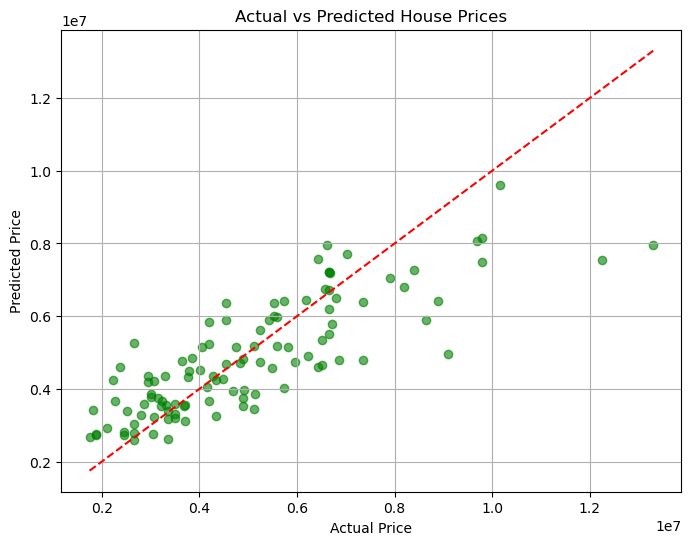

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
